In [2]:
from pathlib import Path
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import spectral
import spectral.io.envi as envi

from typing import Callable
from IPython.display import display


np.set_printoptions(linewidth=800)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [3]:
# oobx_dir = Path('../fruits_dataset')

# fruit = 'Mango'
# img = 'VIS/day_11_m3/mango_day_11_m3_33_back'

# path = oobx_dir / fruit / img if oobx_dir.exists() else None

# img_1 = envi.open(f'{path}.hdr', image=f'{path}.bin')
# img_1.shape

In [4]:
def load_data(main_folder: str, fruit: str) -> pd.DataFrame:
    absolute = main_folder

    all_folders = os.listdir(absolute)

    data = dict(day=[], fruit=[], hdr=[], bin=[])
    for folder in all_folders:
        data_paths = os.listdir(absolute / folder)
        day_label = folder.replace("_m3", "")

        for path in data_paths:
            extension = path.split(".")[1]
            if extension == "bin":
                continue
            
            prefix = absolute / folder
            data["day"].append(day_label)
            data["fruit"].append(fruit)
            data["hdr"].append(prefix / path)
            data["bin"].append(prefix / data_paths[data_paths.index(path.replace(".hdr", ".bin"))])

    return pd.DataFrame.from_dict(data)


def get_image_min_max(img: np.array):
    print(f"Max band value {np.max(img)}, Min band value {np.min(img)}")
    return img


def read_image(hdr: str, bin: str, image_transforms: list[Callable] | None = None):
    img = envi.open(hdr, image=bin).load()

    if image_transforms is not None and len(image_transforms) != 0:
        for transform in image_transforms:
            img = transform(img)
    
    return img
    

In [8]:
oobx_dir = Path('../fruits_dataset')

fruit = 'Mango'

path = oobx_dir / fruit / 'VIS'

anno_path = oobx_dir / 'annotations'
val_json = anno_path / 'val_v2.json'

In [12]:
kaki = load_data(path, "kaki")
kaki.head()

,day,fruit,hdr,bin
0,day_10,kaki,../fruits_dataset/Mango/VIS/day_10_m3/mango_da...,../fruits_dataset/Mango/VIS/day_10_m3/mango_da...
1,day_10,kaki,../fruits_dataset/Mango/VIS/day_10_m3/mango_da...,../fruits_dataset/Mango/VIS/day_10_m3/mango_da...
2,day_10,kaki,../fruits_dataset/Mango/VIS/day_10_m3/mango_da...,../fruits_dataset/Mango/VIS/day_10_m3/mango_da...
3,day_10,kaki,../fruits_dataset/Mango/VIS/day_10_m3/mango_da...,../fruits_dataset/Mango/VIS/day_10_m3/mango_da...
4,day_10,kaki,../fruits_dataset/Mango/VIS/day_10_m3/mango_da...,../fruits_dataset/Mango/VIS/day_10_m3/mango_da...


In [13]:
paths = load_data(path, 'mango')
df = pd.DataFrame.from_dict(paths)
df.head()

,day,fruit,hdr,bin
0,day_10,mango,../fruits_dataset/Mango/VIS/day_10_m3/mango_da...,../fruits_dataset/Mango/VIS/day_10_m3/mango_da...
1,day_10,mango,../fruits_dataset/Mango/VIS/day_10_m3/mango_da...,../fruits_dataset/Mango/VIS/day_10_m3/mango_da...
2,day_10,mango,../fruits_dataset/Mango/VIS/day_10_m3/mango_da...,../fruits_dataset/Mango/VIS/day_10_m3/mango_da...
3,day_10,mango,../fruits_dataset/Mango/VIS/day_10_m3/mango_da...,../fruits_dataset/Mango/VIS/day_10_m3/mango_da...
4,day_10,mango,../fruits_dataset/Mango/VIS/day_10_m3/mango_da...,../fruits_dataset/Mango/VIS/day_10_m3/mango_da...


In [14]:
img = read_image(df.iloc[5].hdr, df.iloc[5].bin, [get_image_min_max])

Max band value 0.8948286771774292, Min band value -0.1301896870136261


/home/oobx/Pulpit/PROJEKTY/SIiUM/env/lib/python3.11/site-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


ImageView object:
  Display bands       :  [0, 100, 223]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.10148614645004272, 0.39505478739738464]
    G: [-0.002846541814506054, 0.09734891355037689]
    B: [-0.014835581183433533, 0.6780052781105042]

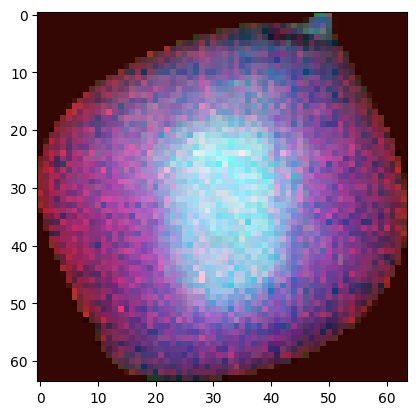

In [15]:
spectral.imshow(img[:, :], bands=[0, 100, 223])

ImageView object:
  Display bands       :  [0, 112, 223]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.061935026198625565, 0.33606481552124023]
    G: [0.10812787711620331, 0.17910465598106384]
    B: [0.5040745139122009, 0.6722214221954346]

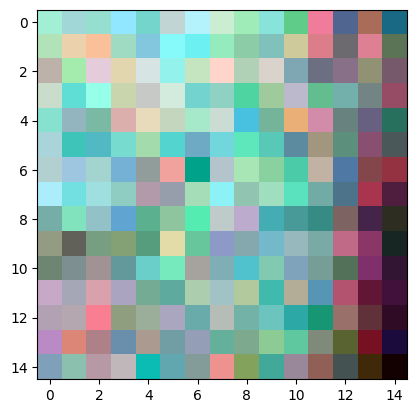

In [16]:
rgb_bands = [0, 112, 223]
spectral.imshow(img[30:45, 30:45], bands=rgb_bands)

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.017052169889211655, 0.8846620917320251]
    G: [-0.017052169889211655, 0.8846620917320251]
    B: [-0.017052169889211655, 0.8846620917320251]

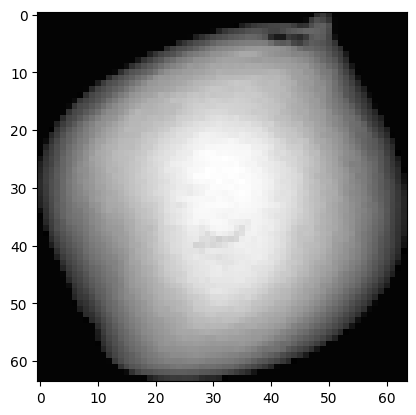

In [17]:
single_band = img[:, :, 150]
spectral.imshow(single_band)

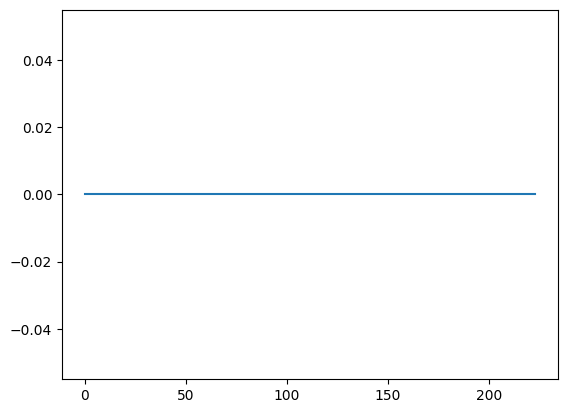

In [48]:
plt.plot(img[10, 10])
plt.show()

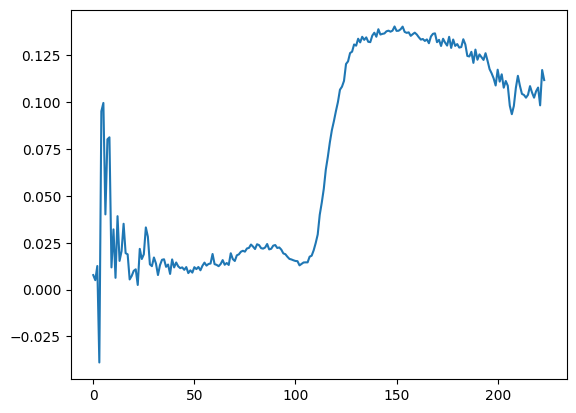

In [12]:
plt.plot(img[10, 11])
plt.show()

In [22]:
data = json.loads(val_json.read_text())
df = pd.json_normalize(data)

In [23]:
for item in df:
    print(item)

cameras
days
records
annotations
info.createdAt


In [24]:

df_combined = pd.DataFrame({
    'Specim bands to nm': dict(enumerate(df.cameras[0][0]['wavelengths'])),
    'Redeye bands to nm': dict(enumerate(df.cameras[0][1]['wavelengths'])),
    'Corning bands to nm':dict(enumerate(df.cameras[0][2]['wavelengths'])),
})

df_combined.head(9)

,Specim bands to nm,Redeye bands to nm,Corning bands to nm
0,397.66,919.6780,408.034
1,400.28,922.9758,410.023
2,402.90,926.2727,412.012
3,405.52,929.5688,414.001
4,408.13,932.8640,415.989
5,410.75,936.1584,417.978
6,413.37,939.4520,419.967
7,416.00,942.7448,421.956
8,418.62,946.0367,423.945


In [44]:
def find_closest_wavelenght(wavelength):
    water_marks = np.array([970, 1190, 1450, 1940])
    tol = 1  # nm
    
    if pd.isna(wavelength):
        return None
        
    rng = water_marks[np.logical_and(wavelength >= water_marks - tol, wavelength <= water_marks + tol)]
    
    if len(rng) > 0:
        return np.where(water_marks == rng[0])[0].astype('uint8')[0]

In [45]:

df_combined['Water mark Specim'] = df_combined['Specim bands to nm'].apply(find_closest_wavelenght)
df_combined['Water mark Redeye'] = df_combined['Redeye bands to nm'].apply(find_closest_wavelenght)
df_combined['Water mark Corning'] = df_combined['Corning bands to nm'].apply(find_closest_wavelenght)


In [46]:

watermark_specim = df_combined['Water mark Specim'].dropna().index.to_list()
watermark_redeye = df_combined['Water mark Redeye'].dropna().index.to_list()
watermark_corning = df_combined['Water mark Corning'].dropna().index.to_list()


In [47]:
print(f"""
Specim idx: {watermark_specim}\n
Redeye idx: {watermark_redeye}\n
Corning idx: {watermark_corning}
""")


Specim idx: [211]

Redeye idx: [15, 83, 164]

Corning idx: []

